# Model Training

**1.1 Importing data and required packages**

In [6]:
#Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [7]:
!pip install catboost


In [8]:
!pip install xgboost

In [9]:
df = pd.read_csv('data/stud.csv')

In [10]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Preparing X and Y variable**

In [11]:
X = df.drop('reading_score',axis=1)

In [12]:
X.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,69,88
2,female,group B,master's degree,standard,none,90,93
3,male,group A,associate's degree,free/reduced,none,47,44
4,male,group C,some college,standard,none,76,75


In [13]:
y = df['reading_score']

In [14]:
y.head(5)

0    72
1    90
2    95
3    57
4    78
Name: reading_score, dtype: int64

In [15]:
# create column transformer with 3 types of transformer

num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor  = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer,cat_feature),
        ('StandardScaler',numeric_transformer,num_feature),
    ]
)

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.39002351,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.19207553,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.57771141,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.46775108, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12609287,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.71993682,  1.18158627]])

In [18]:
X.shape

(1000, 19)

In [19]:
#separate data set into train and test 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

**Create an Evaluate Function to give all metrics after model training**

In [20]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #make prediction

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)


    #   Evaluate Train test dataset

    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train,y_train_predict)
    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test,y_test_predict)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for training set')
    print('- Root mean square roor: {:.4f}'.format(model_train_rmse))
    print('- Mean absolute error: {:.4f}'.format(model_train_mae))
    print('- R2 score: {:.4f}'.format(model_train_r2))

    print('------------------------------')

    print('Model performance for test set')
    print('- Root mean square roor: {:.4f}'.format(model_test_rmse))
    print('- Mean absolute error: {:.4f}'.format(model_test_mae))
    print('- R2 score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    

    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
- Root mean square roor: 3.8739
- Mean absolute error: 3.1245
- R2 score: 0.9282
------------------------------
Model performance for test set
- Root mean square roor: 4.3164
- Mean absolute error: 3.4975
- R2 score: 0.9177


Lasso
Model performance for training set
- Root mean square roor: 4.2215
- Mean absolute error: 3.4220
- R2 score: 0.9147
------------------------------
Model performance for test set
- Root mean square roor: 4.6350
- Mean absolute error: 3.6941
- R2 score: 0.9051


Ridge
Model performance for training set
- Root mean square roor: 3.8720
- Mean absolute error: 3.1221
- R2 score: 0.9282
------------------------------
Model performance for test set
- Root mean square roor: 4.3028
- Mean absolute error: 3.4861
- R2 score: 0.9182


K-Neighbors Regressor
Model performance for training set
- Root mean square roor: 4.8028
- Mean absolute error: 3.7437
- R2 score: 0.8896
------------------------------
Model performance 

**Results**

In [22]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge,0.918184
0,Linear Regression,0.917664
6,CatBoosting Regressor,0.907223
7,AdaBoost Regressor,0.905093
1,Lasso,0.905059
5,XGBRegressor,0.899641
3,K-Neighbors Regressor,0.837096
4,Decision Tree,0.826214


**Linear Regresssion**

In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f' %score)


Accuracy of the model is 91.77


**Plot y_pred and y_test**

Text(0, 0.5, 'Predicted')

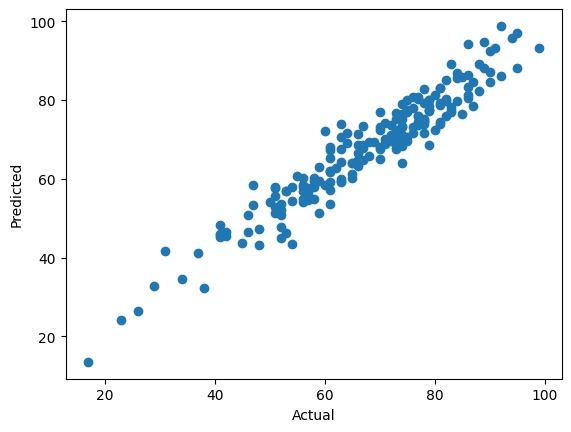

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='reading_score'>

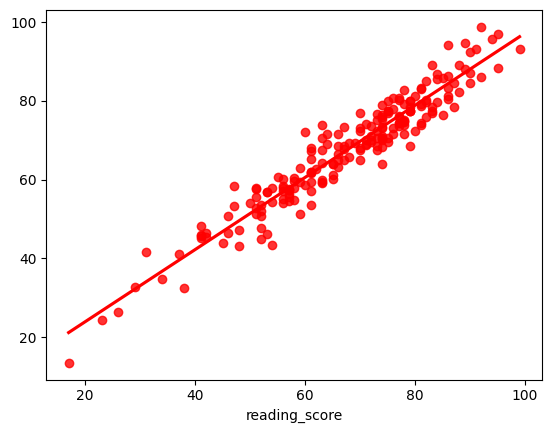

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

**Difference betweena Actual and predicted Values**

In [26]:
pred_df = pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Values,Predicted Values,Difference
521,86,86.265625,-0.265625
737,66,71.468750,-5.468750
740,73,72.265625,0.734375
660,77,75.812500,1.187500
411,83,78.328125,4.671875
...,...,...,...
408,57,56.375000,0.625000
332,56,54.171875,1.828125
208,81,78.687500,2.312500
613,77,74.359375,2.640625
